## Задача: На основе данных из файла подготовить отчет о проведении профилактических осмотров населения. Как меняется ситуация по годам? Какие выводы можно сделать на основе имеющихся данных?

In [1]:
import pandas as pd
import random as rd
import re

import statistics

import scipy.stats as sts
import numpy as np

from pylab import rcParams
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# смотрим наш ДФ и транспонируем его
disp0 = pd.read_excel('dispans_0.xls', index_col = 'cat')
work_df = disp0.T
work_df

cat,adults,teens,S_teens,childs,adultsP,teensP,S_teensP,childsP
1980,24543.0,2960.4,NaN,26936.5,93.5,97.7,NaN,96.8
1990,22307.3,3079.8,NaN,29920.3,88.8,97.2,NaN,88.1
1995,19215.9,3353.0,2775.6,25837.3,87.0,94.1,NaN,82.4
2000,19787.3,3285.1,3857.7,20593.0,90.7,94.5,96.5,80.5
2001,20730.2,3115.7,4071.0,20042.9,91.8,94.2,90.4,82.0
2002,20085.5,3115.7,4404.2,21293.3,91.7,96.3,90.3,90.5
2003,19239.9,3137.5,4250.8,19262.7,91.6,96.3,83.8,84.9
2004,19250.8,3091.5,4084.1,18454.8,91.6,95.4,86.8,83.5
2005,18649.2,2958.8,3890.5,18496.9,91.6,95.9,86.8,85.6
2006,18419.4,2756.6,3716.7,18356.8,92.0,95.8,84.1,85.1


In [15]:
# удаляю строки с NaN
clear_df = work_df.dropna()

In [16]:
stat_clear_df = clear_df.describe()
# добавляем размах
stat_clear_df_T = stat_clear_df.T
stat_clear_df_T['range'] = stat_clear_df_T['max'] - stat_clear_df_T['min']
stat_clear_df = stat_clear_df_T.T
stat_clear_df

cat,adults,teens,S_teens,childs,adultsP,teensP,S_teensP,childsP
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,18163.614286,2444.507143,3521.128571,19038.514286,92.792857,95.721429,86.928571,84.100000
std,1551.934983,724.791907,584.869056,964.462258,1.473073,0.910772,3.435209,2.314503
min,15824.000000,1267.100000,2772.200000,18259.000000,90.700000,94.200000,83.800000,80.500000
25%,17058.225000,1845.750000,2933.675000,18361.575000,91.625000,95.400000,84.575000,83.000000
50%,18125.500000,2628.600000,3579.700000,18547.800000,92.250000,95.850000,86.100000,83.650000
75%,19248.075000,3109.650000,4025.875000,19328.700000,94.000000,96.300000,86.950000,84.975000
max,20730.200000,3285.100000,4404.200000,21293.300000,95.100000,97.100000,96.500000,90.500000
range,4906.200000,2018.000000,1632.000000,3034.300000,4.400000,2.900000,12.700000,10.000000


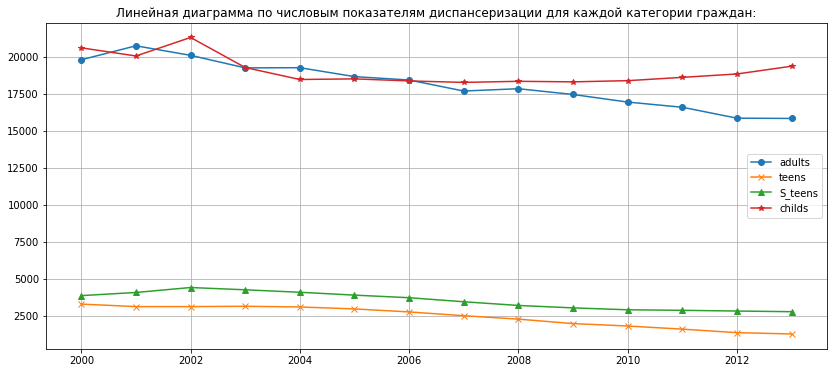

In [17]:
# быстрый плот транспонированной таблицы 'clear_df'
# в абсолютных числах
plt.figure()
plt.plot(clear_df.adults, marker='o', label='adults')
plt.plot(clear_df.teens, marker='x', label='teens')
plt.plot(clear_df.S_teens, marker='^', label='S_teens')
plt.plot(clear_df.childs, marker='*', label='childs')
plt.legend(loc='best')
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.title('Линейная диаграмма по числовым показателям диспансеризации для каждой категории граждан:')
plt.show()

Наблюдаю существенное снижение количества обследуемых взрослых начиная с 2001 года и рост аналогичного показателя у детей до 14 лет с 2009 (относительно стабильный показатель с 2004) года. Полагаю, это связано с рождаемостью и численностью населения.

**Линейная диаграмма по процентным показателям диспансеризации интереснее:**

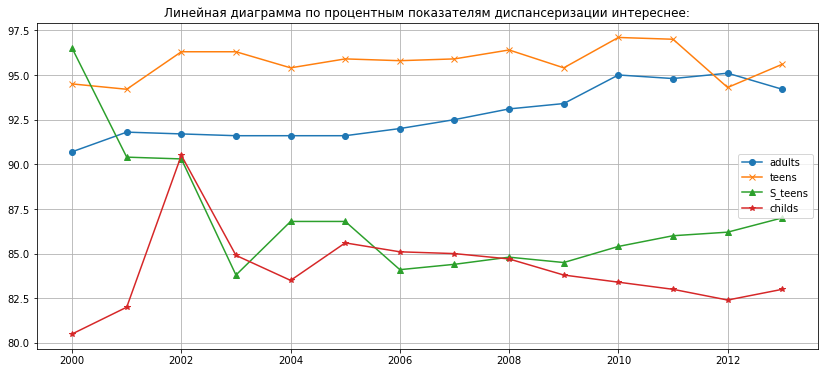

In [18]:
# быстрый плот транспонированной таблицы 'clear_df'
# в процентах
plt.figure()
plt.plot(clear_df.adultsP, marker='o', label='adults')
plt.plot(clear_df.teensP, marker='x', label='teens')
plt.plot(clear_df.S_teensP, marker='^', label='S_teens')
plt.plot(clear_df.childsP, marker='*', label='childs')
plt.legend(loc='best')
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.title('Линейная диаграмма по процентным показателям диспансеризации интереснее:')
plt.show()

**Заметим:**
* за десятилетие сильно упал процент диспансеризации школьников;
*	все остальные категории граждан стали осматриваться врачами чаще в сравнении с началом 00-х;
*	наиболее стабильный рост показателя наблюдается у взрослых людей, при этом помним о падении абсолютного числового показателя; 
*	поразительный скачок процентного соотношения профилактических осмотров детей в 2002 году, почти на 10%;
*	после 2005 года процент профилактических осмотров детей стабильно падал до 2012 года;
*	в 2013 году врачи смогли наблюдать большую долю граждан всех категорий по сравнению с прошлым периодом, кроме взрослого населения.


**Далее посмотрю, как коррелируют данные между собой, сначала в количественных показателях:**

* количество осматриваемых взрослых и подростков взаимно высокое;
* о какой-то взаимосвязи диспансеризации детей с остальными категориями говорить сложно из-за маленькой выборки и аномальными значениями в начале века.


<Figure size 1080x576 with 0 Axes>

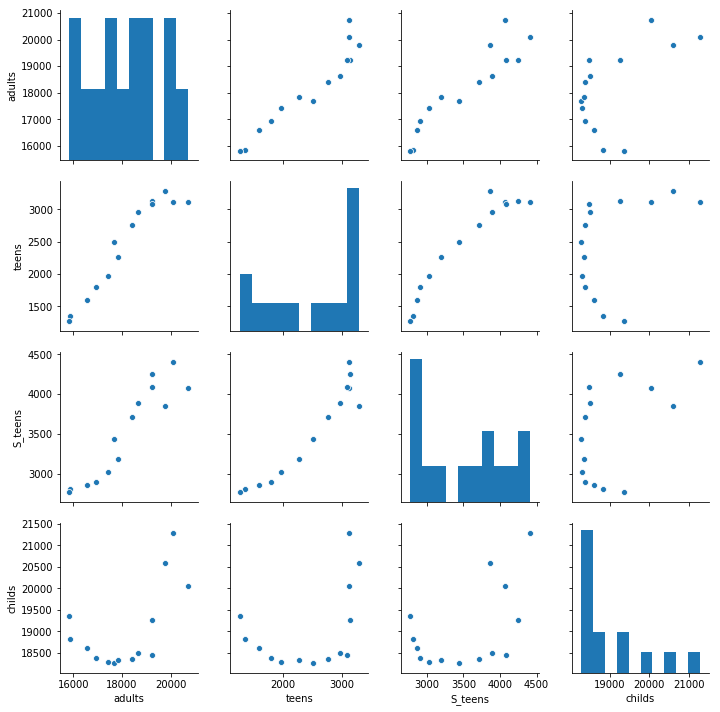

In [19]:
# быстрый точечный график корреляции переменных 'clear_df'
# в абсолютных числах
plt.figure()
sns.pairplot(data=clear_df[["adults","teens","S_teens","childs"]])


**Графики процентных показателей от выполнения плана осмотров нагляднее:**
    
* Видна прямая и обратные зависимости.

* Отсутствие четкой взаимосвязи между разными группами подростков легко объяснить, вспомнив колебания линейного графика. 

<Figure size 1080x576 with 0 Axes>

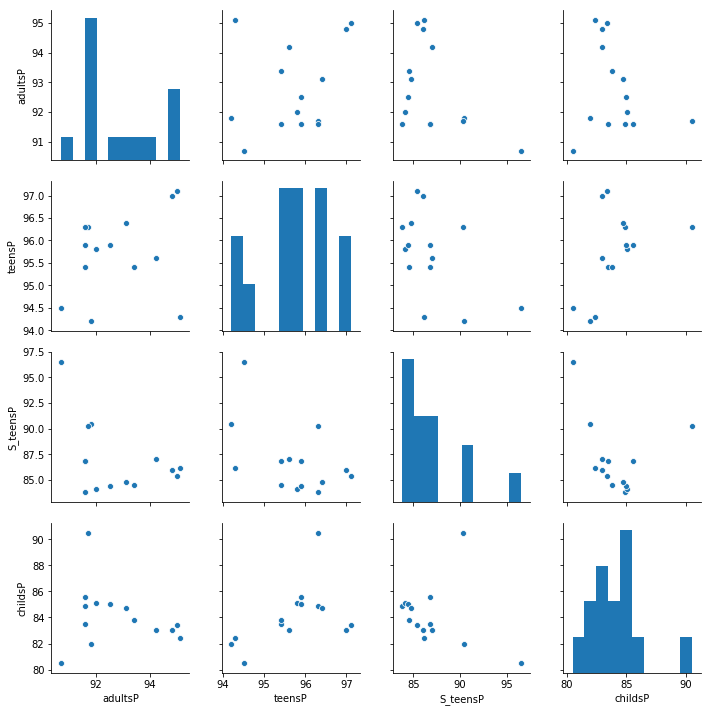

In [20]:
# быстрый точечный график корреляции переменных 'clear_df'
# в процентах
plt.figure()
sns.pairplot(data=clear_df[["adultsP","teensP","S_teensP","childsP"]])

Оценка корреляции довольно поверхностная из-за малой выборки — мы отбросили данные по 5-и годам (1/4 всех данных).

Поэтому дальше расширим временной ряд и объединим статистические данные по подросткам, это тем более правомерно, так как в 2014 и 2015 году статистика объединяла эти категории граждан.

За общее количество профилактически осмотренных школьников в 1980 и 1990 я возьму среднее математическое данного показателя в промежутке с 1995 по 2006 год, после наблюдается резкое падение количества осматриваемых подростков.

За процент осмотренных школьников относительно плана возьму те же значения что и у подростков 15-17 лет. Сформирую таблицу с тремя категориями:

* взрослые – adults (процент от плана adultsP);
* все подростки — teens (процент от плана teensP);
* дети — childs (процент от плана childsP).


In [21]:
# смотрим наш ДФ и транспонируем его
disp02 = pd.read_excel('dispans_03.xls', index_col = 'cat')
new_df = disp02.T
new_df

cat,adults,teens,childs,adultsP,teensP,childsP,P,B
1980,24543.0,6792.9,26936.5,93.5,97.70,96.8,138126.600,2202.779
1990,22307.3,6912.3,29920.3,88.8,97.20,88.1,147665.081,1988.858
1995,19215.9,6128.6,25837.3,87.0,94.10,82.4,148459.937,1363.806
2000,19787.3,7142.8,20593.0,90.7,95.50,80.5,146890.128,1266.800
2001,20730.2,7186.7,20042.9,91.8,92.30,82.0,146303.611,1311.604
2002,20085.5,7519.9,21293.3,91.7,93.30,90.5,145166.731,1396.967
2003,19239.9,7388.3,19262.7,91.6,90.05,84.9,144963.650,1477.301
2004,19250.8,7175.6,18454.8,91.6,91.10,83.5,144168.205,1502.477
2005,18649.2,6849.3,18496.9,91.6,91.35,85.6,143474.219,1457.376
2006,18419.4,6473.3,18356.8,92.0,89.95,85.1,142753.551,1479.637


In [6]:
stat_new_df = new_df.describe()
# добавляем размах
stat_new_df_T = stat_new_df.T
stat_new_df_T['range'] = stat_new_df_T['max'] - stat_new_df_T['min']
stat_new_df = stat_new_df_T.T
stat_new_df

cat,adults,teens,childs,adultsP,teensP,childsP,P,B
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,19752.536842,5808.884211,20568.615789,92.121053,92.550000,85.415789,144008.690947,1673.689789
std,4029.515350,1394.555961,3350.577010,2.192811,2.574015,4.502624,2430.283259,267.474105
min,15824.000000,3507.100000,18259.000000,87.000000,89.950000,80.500000,138126.600000,1266.800000
25%,17559.100000,4582.650000,18415.350000,91.600000,90.425000,82.700000,142805.043500,1467.338500
50%,19215.900000,6128.600000,19262.700000,92.000000,91.350000,83.800000,143474.219000,1713.947000
75%,20407.850000,7027.550000,20943.150000,93.450000,94.700000,85.350000,145717.009500,1898.953000
max,33663.700000,7519.900000,29920.300000,95.100000,97.700000,96.800000,148459.937000,2202.779000
range,17839.700000,4012.800000,11661.300000,8.100000,7.750000,16.300000,10333.337000,935.979000


**Обращаю внимание на:**
* наибольшее стандартное отклонение в числовых показателях в профилактических осмотрах подростков (почти ¼ от среднего значения);
* очень большой размах у процента осматриваемых детей (16,3%) относительно подлежащих осмотру;
* в 2000 году диспансеризацию не прошла 20% детей в возрасте до 14 лет;
* среднее, медиана и 75-перцентиль осматриваемых взрослых и детей имеют близкие значения, удивительно учитывая разницу в остальных показателях;
* максимальное количество взрослых было осмотрено в 2015 году (33,6 млн.), а детей в 1990 (29,9 млн.);
* наибольшая вероятность попасть на профилактический осмотр к врачу у подростка, что логично;
* процент осматриваемых врачами взрослых наиболее стабильный, так же логично.

**Построю графики с новым набором данных:**

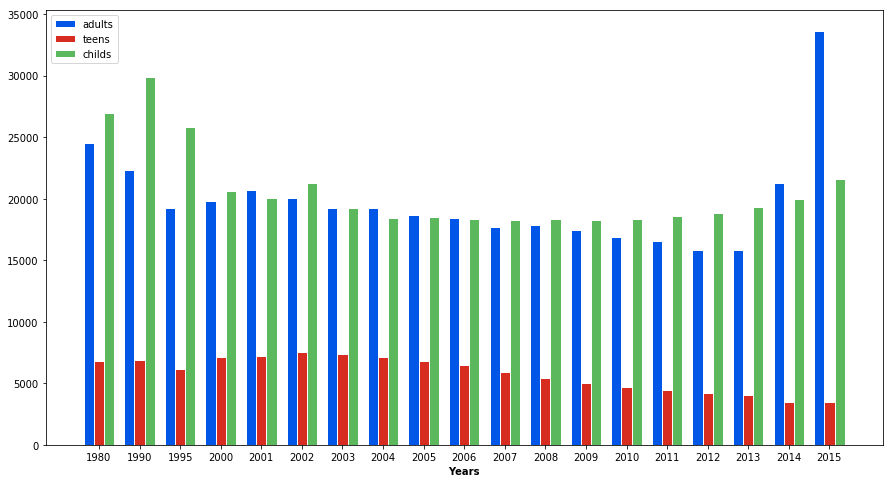

In [7]:
rcParams['figure.figsize'] = 15, 8

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = new_df.adults
bars2 = new_df.teens
bars3 = new_df.childs
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#0057e7', width=barWidth, edgecolor='white', label='adults')
plt.bar(r2, bars2, color='#d62d20', width=barWidth, edgecolor='white', label='teens')
plt.bar(r3, bars3, color='#5cb85c', width=barWidth, edgecolor='white', label='childs')
 
# Add xticks on the middle of the group bars
plt.xlabel('Years', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], new_df.index.values)
 
# Create legend & Show graphic
plt.legend(loc='best')
plt.show()

* Заметно насколько возросло количество профилактических осмотров для взрослого населения по сравнению с советским периодом. В 2014 и 2015 годах профилактический осмотр проходит больше на 5 млн. совершеннолетних чем за предыдущий год. 


* Тем не менее начиная с 2010 года процент осматриваемых взрослых стабильно падает, а подростков наоборот растёт.


* В 2015 году профилактический осмотр прошли 96,1% детей до 14 лет — почти удалось повторить максимальное значение, достигнутое в 1980 году (96,8%). Больший процент был достигнут только в 1980 и 1990 годах при осмотре подростков.


In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

# позволяет интерактив запускть в 'jupiter'
init_notebook_mode(connected=True)

In [9]:
# что визуализируем
# функция Scatter
trace0 = go.Scatter(
    x=new_df.index,
    y=new_df.adultsP,
    name='adults %',
)

trace1 = go.Scatter(
    x=new_df.index,
    y=new_df.teensP,
    name='teens %',
)

trace2 = go.Scatter(
    x=new_df.index,
    y=new_df.childsP,
    name='childs %'
)

# кладем переменные в список
data = [trace0, trace1, trace2]

# настройка физуализации:
layout = {'title': 'Процент прохождения профилактического осмотра (от плана) для каждой категории граждан :'}

# вызываем функцию 'Figure', кладем в парметры наши параметры
fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Еще одно любопытное наблюдение — спираль временного ряда в графиках взаимосвязи рождаемости/населения (взяты с Википедии) и общего количества профилактически осматриваемых граждан:

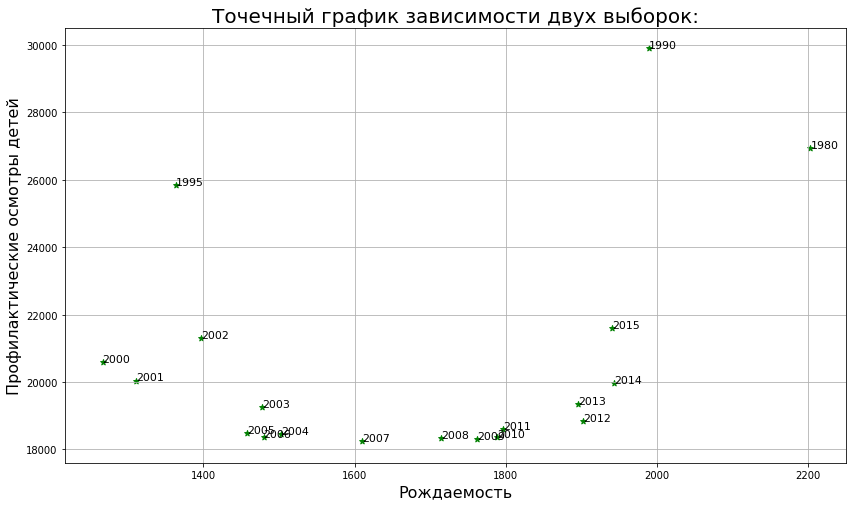

In [10]:
# преобразование 'index' к списку
years_ = list(new_df.index.values)

# берем серии по детям делаем списки
birthrate_ = list(new_df['B'].values)
child_ = list(new_df['childs'].values)

# создаем подписи
for i,year in enumerate(years_):
    x = birthrate_[i]
    y = child_[i]
    plt.scatter(x, y, marker='*', color='green')
    plt.text(x+0.05, y+0.1, year, fontsize=11)

    
# строим точечный график зависимости двух серий:    
plt.xlabel('Рождаемость', fontsize=16)
plt.ylabel('Профилактические осмотры детей', fontsize=16)
plt.title('Точечный график зависимости двух выборок:', fontsize=20)
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()

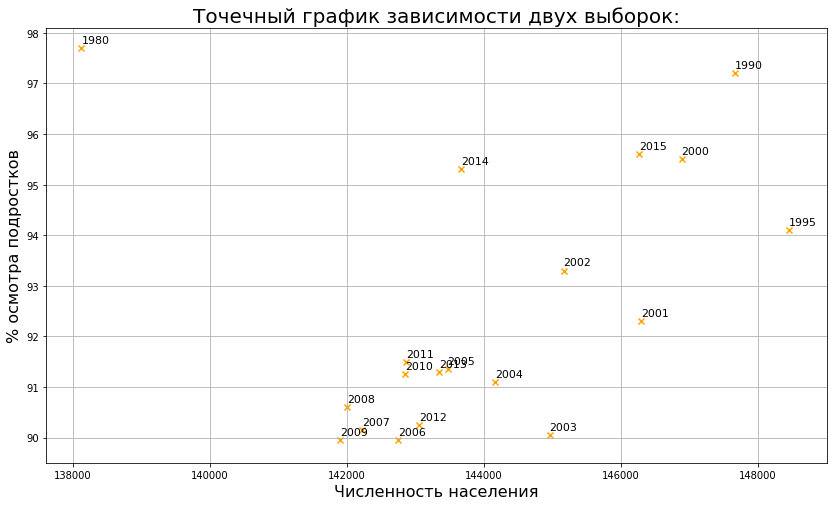

In [11]:
# преобразование 'index' к списку
years_ = list(new_df.index.values)

# берем серии, делаем списки
birthrate_ = list(new_df['P'].values)
child_ = list(new_df['teensP'].values)

# создаем подписи
for i,year in enumerate(years_):
    x = birthrate_[i]
    y = child_[i]
    plt.scatter(x, y, marker='x', color='orange')
    plt.text(x+0.05, y+0.1, year, fontsize=11)

    
# строим точечный график зависимости двух серий:    
plt.xlabel('Численность населения', fontsize=16)
plt.ylabel('% осмотра подростков', fontsize=16)
plt.title('Точечный график зависимости двух выборок:', fontsize=20)
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()


## Посмотрим тоже на 3-мерных графиках:

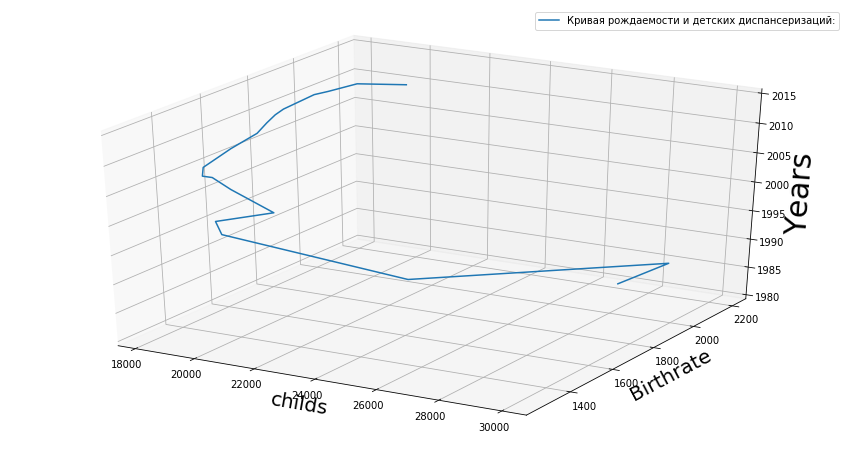

In [12]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
x = new_df['childs']
y = new_df['B']
z = new_df.index
ax.plot(x, y, z, label='Кривая рождаемости и детских диспансеризаций:')
ax.legend()

ax.set_xlabel('childs', fontsize=20, rotation=150)
ax.set_ylabel('Birthrate', fontsize=20, rotation=150)
ax.set_zlabel(r'Years', fontsize=30)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

plt.show()

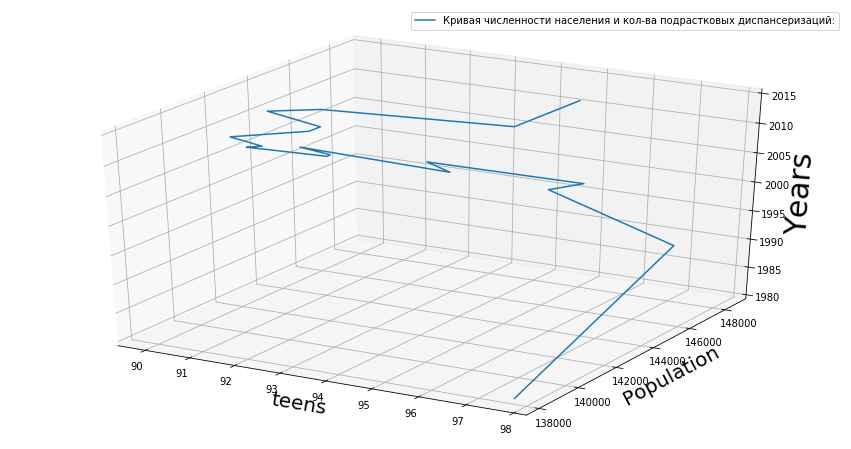

In [13]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
x = new_df['teensP']
y = new_df['P']
z = new_df.index
ax.plot(x, y, z, label='Кривая численности населения и кол-ва подрастковых диспансеризаций:')
ax.legend()

ax.set_xlabel('teens', fontsize=20, rotation=150)
ax.set_ylabel('Population', fontsize=20, rotation=150)
ax.set_zlabel(r'Years', fontsize=30)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

plt.show()

**Выглядит не информативно, нуждается в доработке.**

**Суть — мы еще раз убеждаемся в цикличности всего на свете, если коротко.**